In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [91]:
forest_fires = pd.read_csv(r"/forestfires.csv")

forest_fires.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


data exploration

In [92]:
forest_fires.shape

(517, 31)

In [93]:
forest_fires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [94]:
forest_fires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [95]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [96]:
forest_fires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
forest_fires[forest_fires.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [98]:
forest_fires[forest_fires.duplicated()].shape

(8, 31)

In [99]:
forest_fires.corr()

<ipython-input-99-515a0e3d6de6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  forest_fires.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


<ipython-input-100-ecc80be9818d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest_fires.corr(),annot=True)


<Axes: >

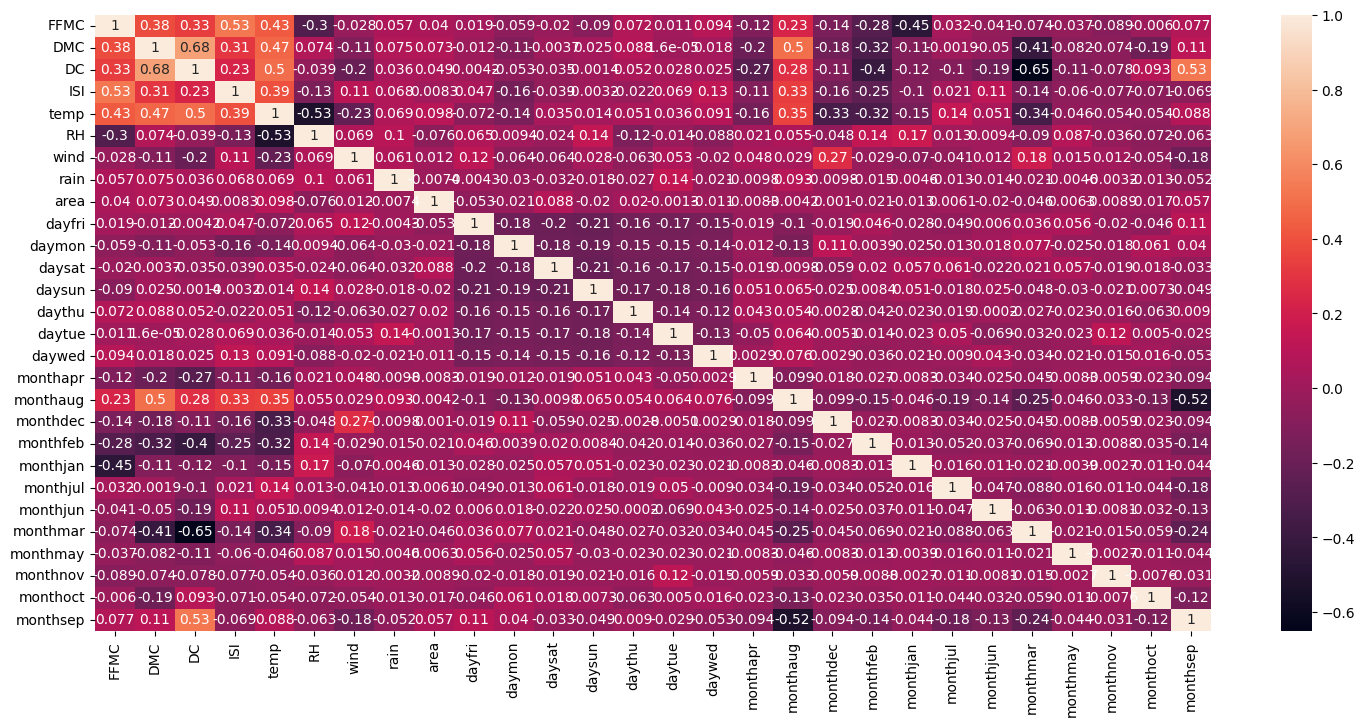

In [100]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(forest_fires.corr(),annot=True)

In [101]:
numerical_features=[feature for feature in forest_fires.columns if forest_fires[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
forest_fires[numerical_features].head()

Number of numerical variables: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [102]:
categorical = [var for var in forest_fires.columns if forest_fires[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


univariate plots

<ipython-input-103-3988fd8761a9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forest_fires[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


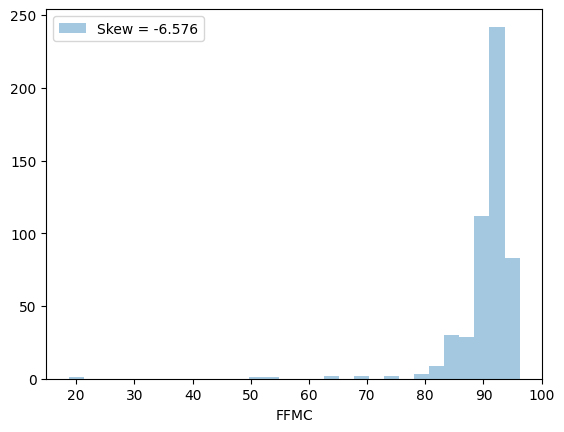

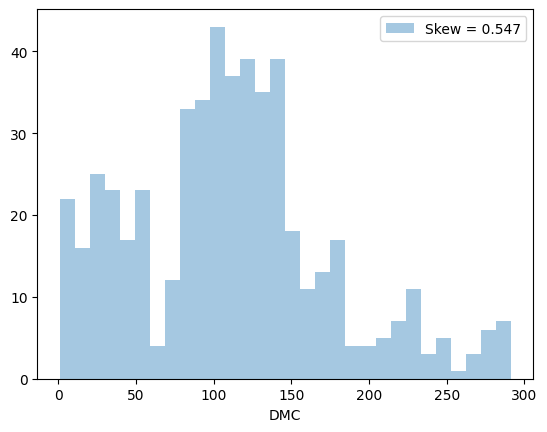

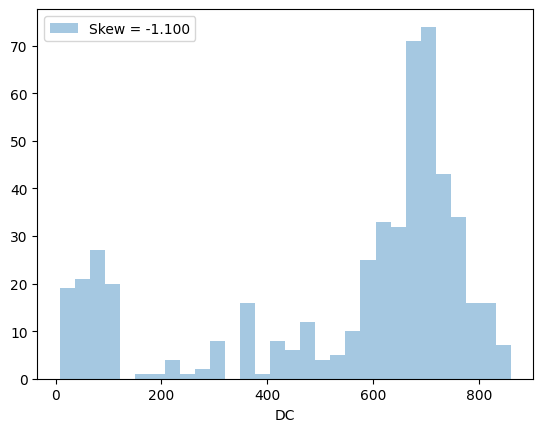

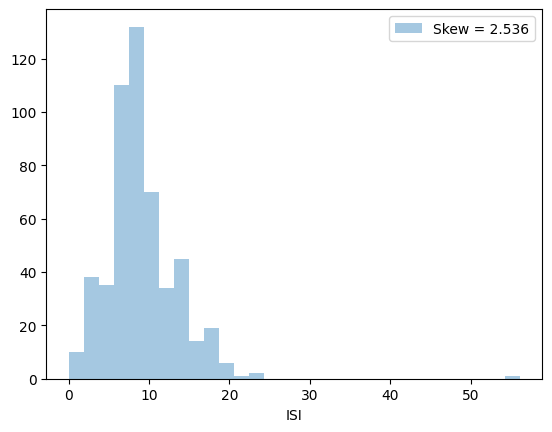

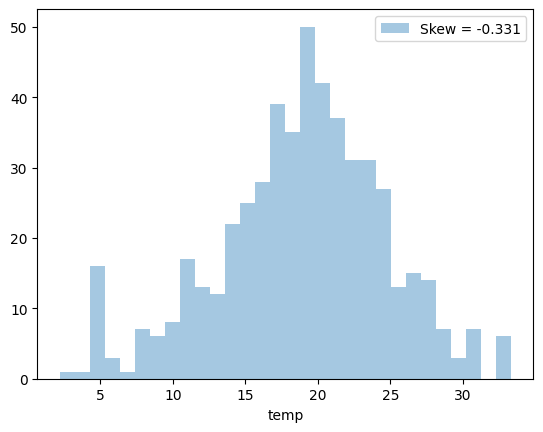

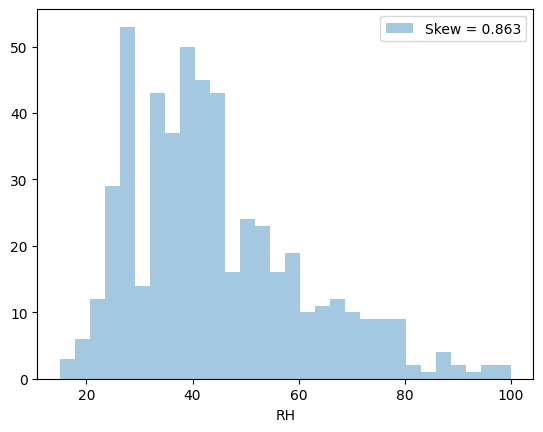

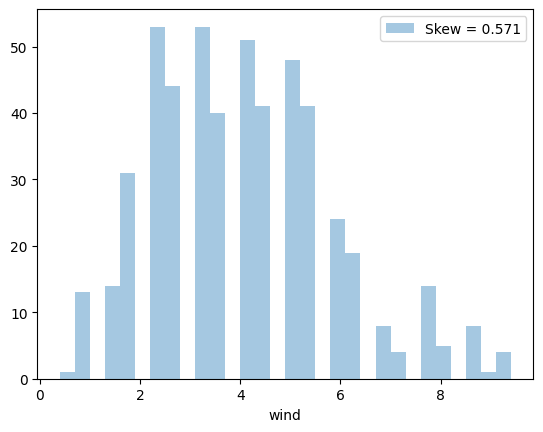

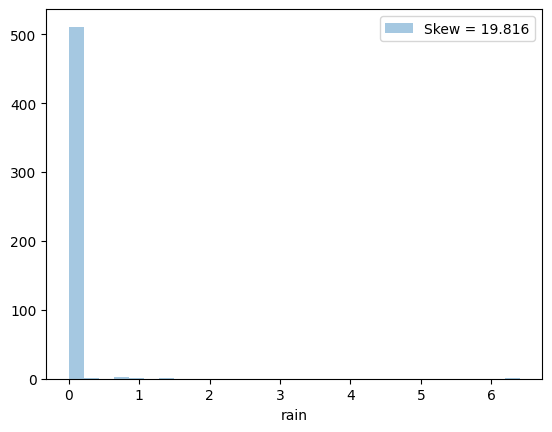

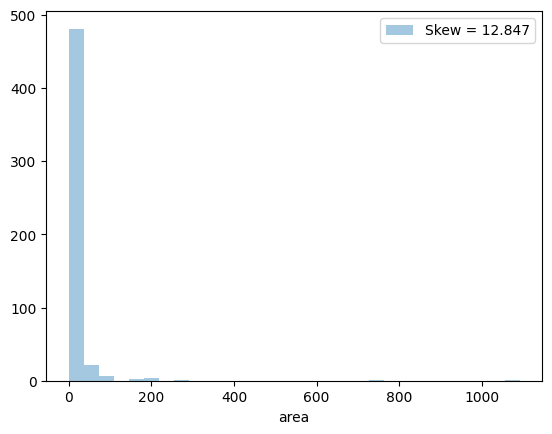

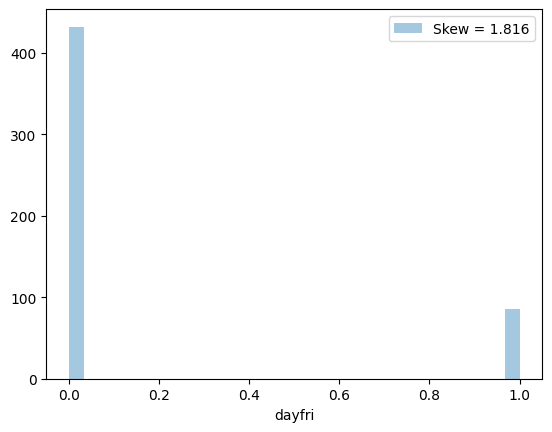

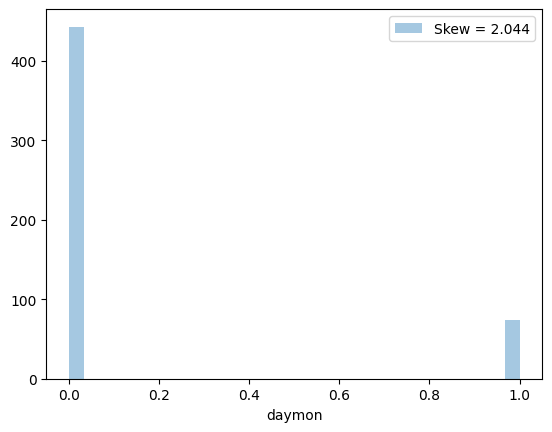

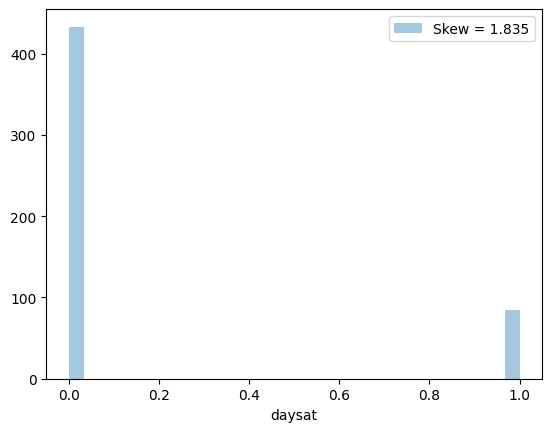

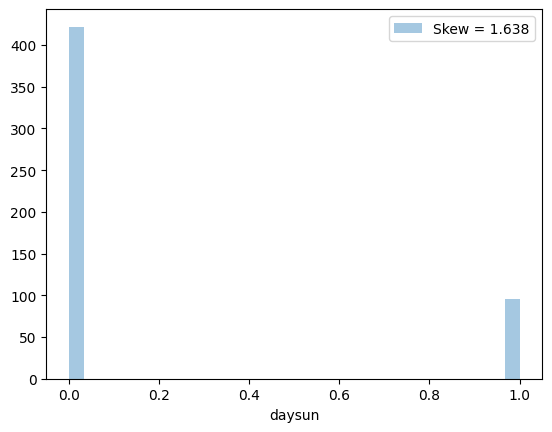

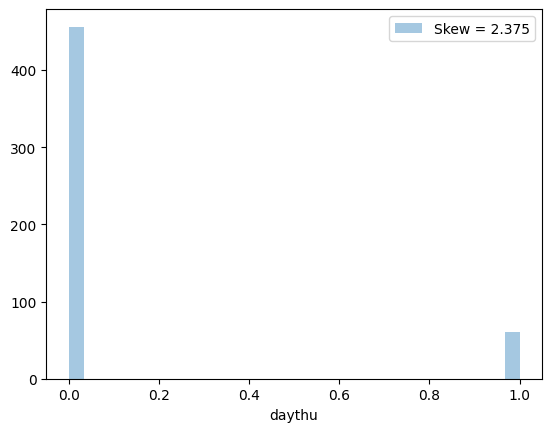

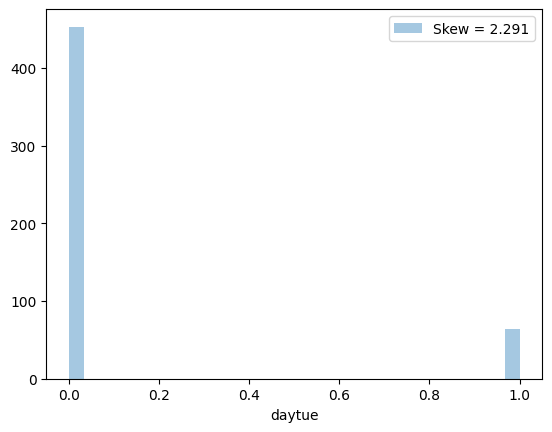

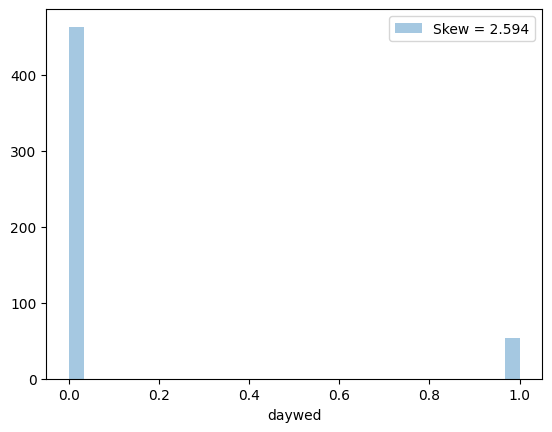

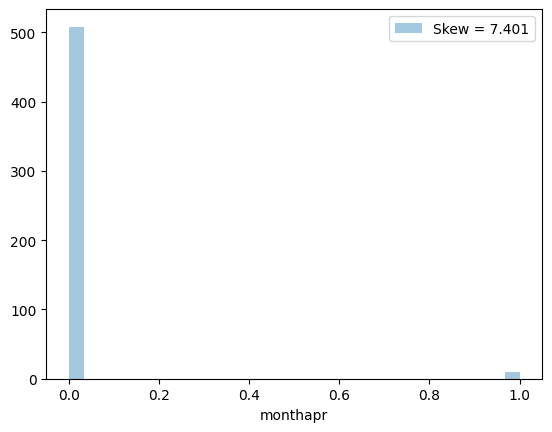

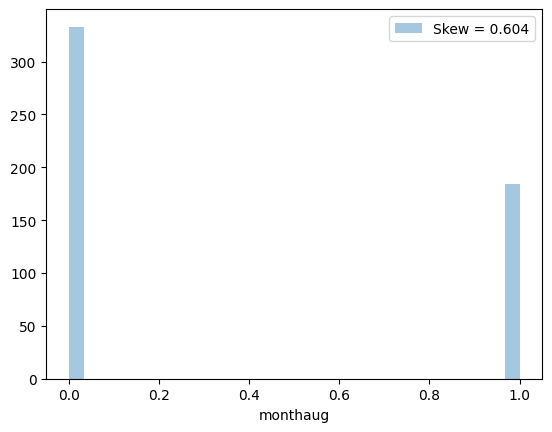

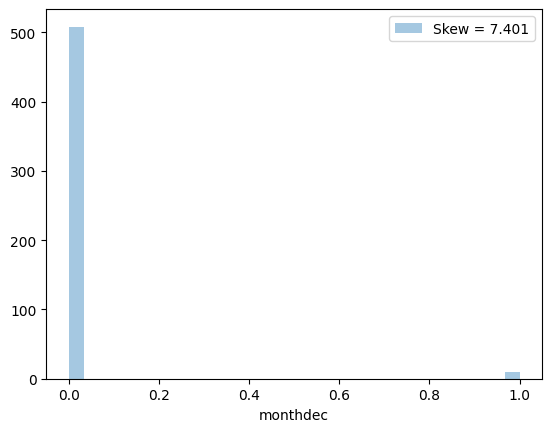

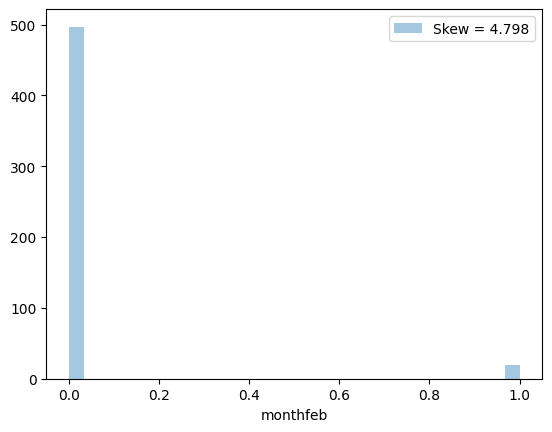

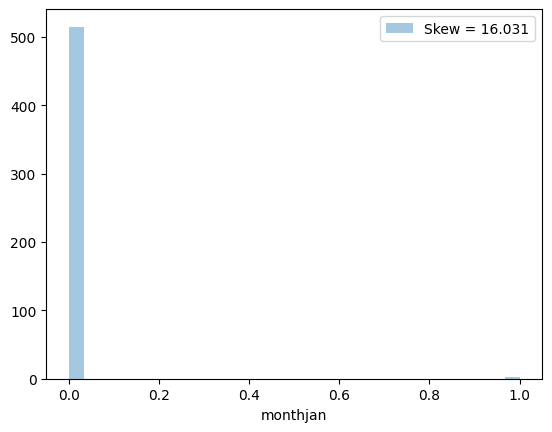

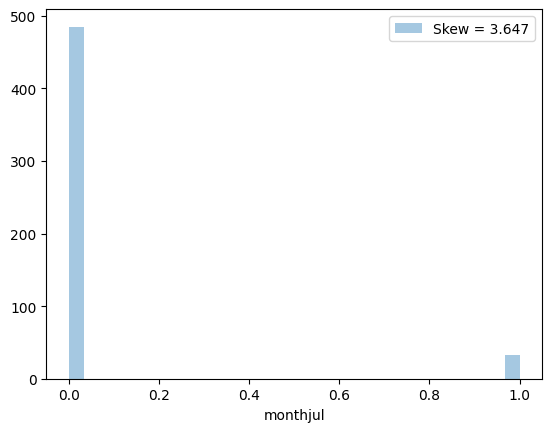

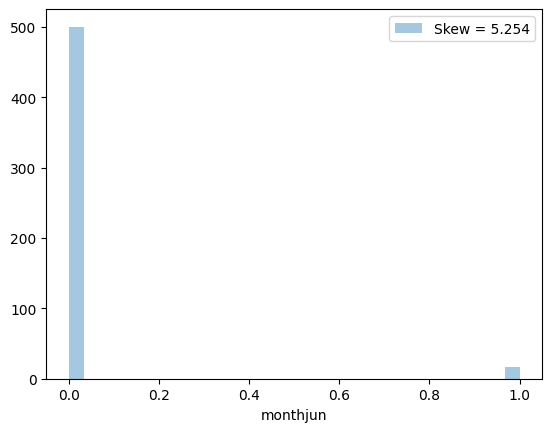

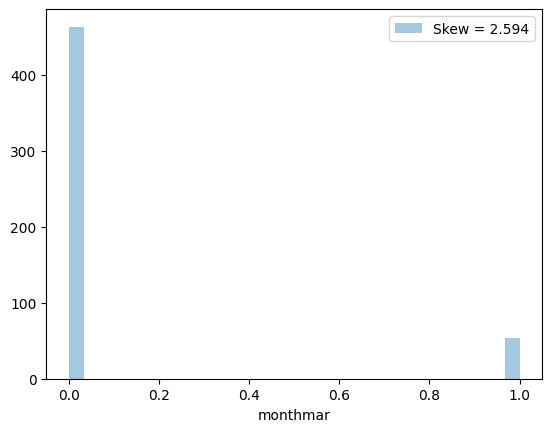

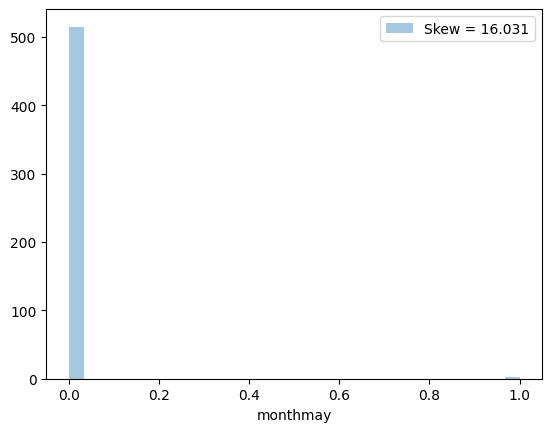

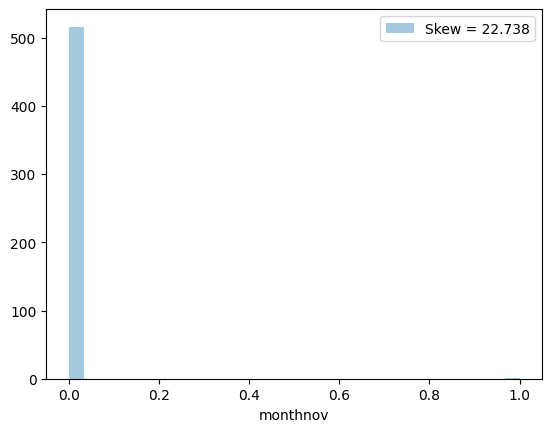

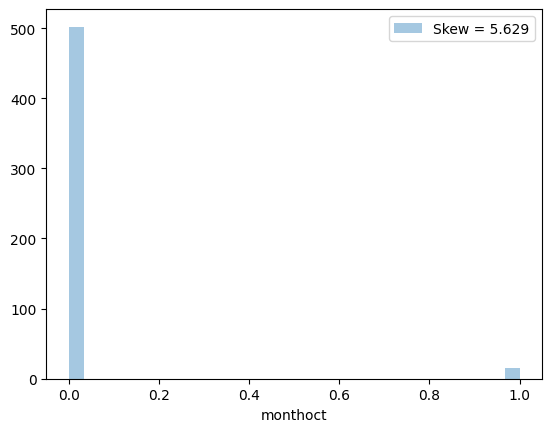

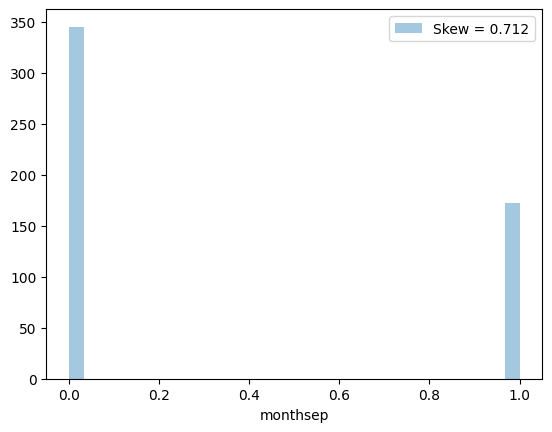

In [103]:
for feat in numerical_features:
    skew = forest_fires[feat].skew()
    sns.distplot(forest_fires[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# outliers

<ipython-input-104-eff3ef35926b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
<ipython-input-104-eff3ef35926b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
<ipython-input-104-eff3ef35926b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
<ipython-input-104-eff3ef35926b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `

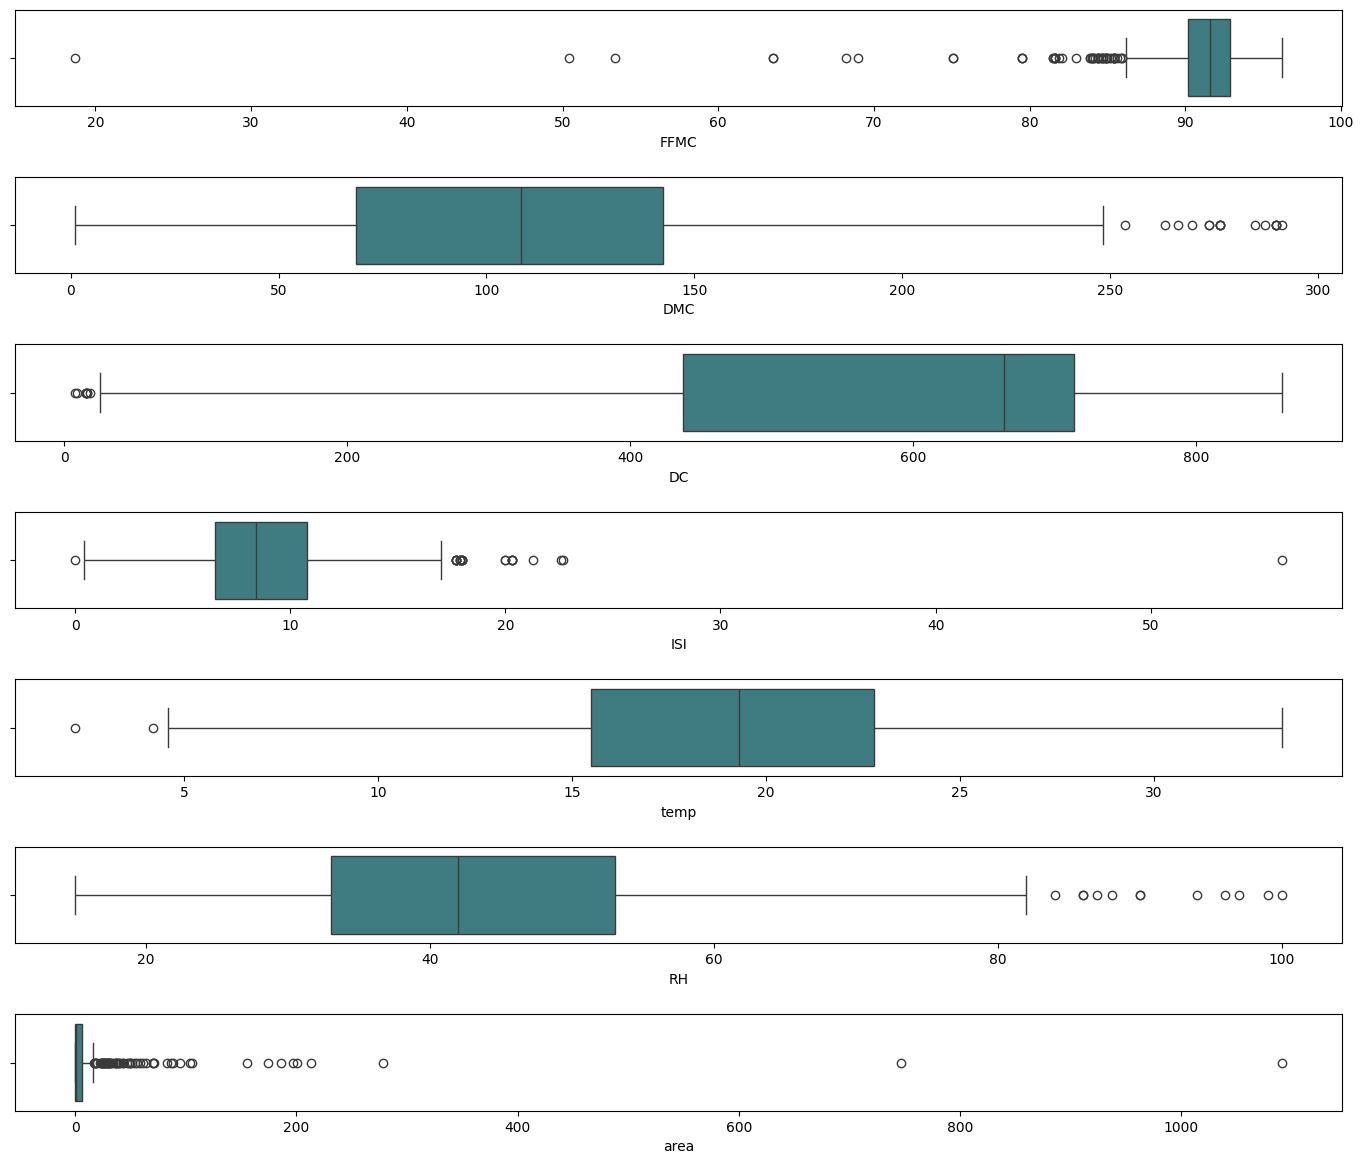

In [104]:
ot=forest_fires.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

many number of outliers are present. but we cant drop since it may contain information and data is large

# log transformation

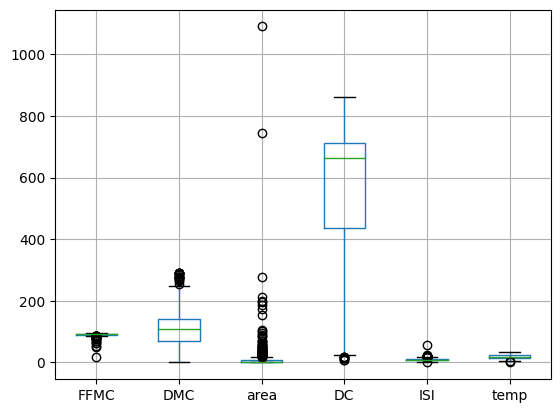

In [105]:
data=forest_fires.copy()

data.boxplot(column=["FFMC","DMC","area","DC","ISI","temp"])

plt.show()

AREA insights using visualization

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


<ipython-input-106-8dad7fac262b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(forest_fires['area'],shade=True,color='g')


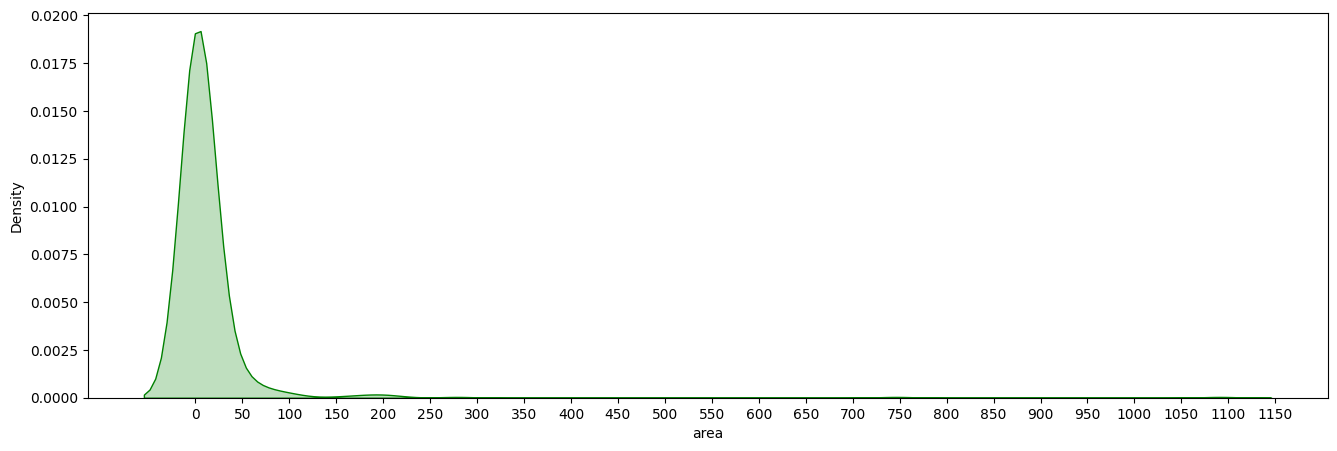

In [106]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forest_fires['area'].skew()))
print("Kurtosis: {}".format(forest_fires['area'].kurtosis()))
ax = sns.kdeplot(forest_fires['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

<Axes: ylabel='area'>

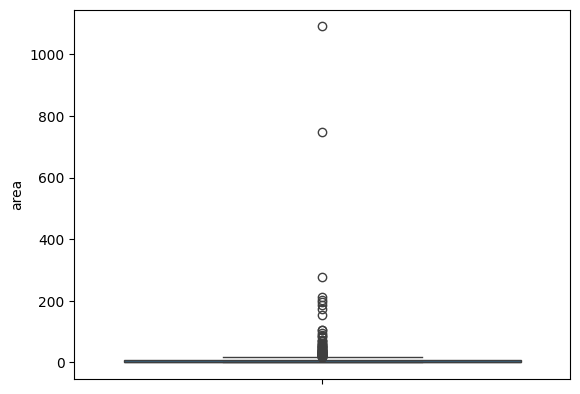

In [107]:
sns.boxplot(forest_fires["area"])

data is having  positively skewed and high kurtosis.

In [108]:
categorical_features=[feature for feature in forest_fires.columns if forest_fires[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
forest_fires[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


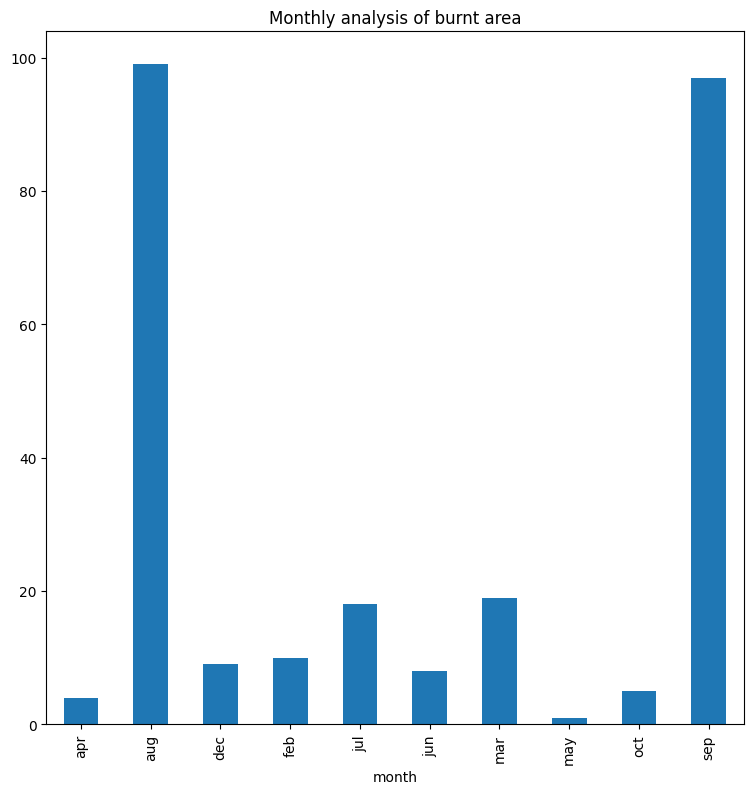

In [109]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=forest_fires[forest_fires['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='bar',title='Monthly analysis of burnt area',figsize=(9,9))
plt.show()

august and september months have recorder highest burnt of forest fire and minimum in may.

In [110]:
df_standard_scaled = forest_fires.copy()
features = df_standard_scaled[numerical_features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[numerical_features] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small


In [111]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,...,0,0,0,1,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,...,0,1,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,...,0,1,0,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,...,0,0,0,1,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,...,0,0,0,0,0,0,1,0,0,0


In [112]:
df['size_category'] = forest_fires.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,...,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,...,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,...,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,...,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,...,0,0,0,0,0,1,0,0,0,0


feature selection

In [113]:
forest_fires.drop(['month','day','area'] ,axis=1, inplace= True)
data_ = forest_fires.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [114]:
data_['size_category'] = df.size_category
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_["size_category"])
data_["size_category"]=le.transform(data_["size_category"])
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
# split into input (X) and output (y) variables
X = data_.drop('size_category', axis = 1)

y=  data_.size_category

In [117]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [118]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [119]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [120]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


In [121]:
model_data=df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.073268,-0.736124,-0.100753,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.846648,0.474768,1.638592,-0.073268,0.995798,0.651674,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.846648,0.474768,1.577248,-0.073268,1.498614,-0.026532,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.549003,0.269382,-0.140366,-0.073268,-0.009834,-0.202020,0,1,0,0,0,0,0,0,0,0,0,0,0


In [122]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [123]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

# HYPERPARAMETER TUNING

In [124]:
## CREATING A MODEL AND COMPILING

def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [150]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False


In [145]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot



In [158]:
 !python -m pip install scikeras

In [159]:
from kerastuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [165]:
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [152]:


tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [153]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.9551281929016113

Best val_accuracy So Far: 0.9807692170143127
Total elapsed time: 00h 02m 26s


In [154]:
tuner.results_summary()

Results summary
Results in project/Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 11
units_0: 64
units_1: 96
learning_rate: 0.01
units_2: 64
units_3: 32
units_4: 32
units_5: 96
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
Score: 0.9807692170143127

Trial 3 summary
Hyperparameters:
num_layers: 4
units_0: 64
units_1: 64
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 96
units_5: 64
units_6: 96
units_7: 32
units_8: 64
units_9: 32
units_10: 32
Score: 0.9786324699719747

Trial 4 summary
Hyperparameters:
num_layers: 6
units_0: 96
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 96
units_4: 32
units_5: 96
units_6: 32
units_7: 64
units_8: 64
units_9: 96
units_10: 32
Score: 0.9551281929016113

Trial 1 summary
Hyperparameters:
num_layers: 6
units_0: 32
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.8931623697280884

Trial 0 summary
Hyperparameter

# hyperparameter tuning : optimal batc size, number of epochs

In [155]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [166]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [168]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.875 total time=   1.6s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   1.6s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.839 total time=   2.5s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   1.1s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.871 total time=   0.9s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/16] END ....batch_size=10, epochs=50;, score=0.875 total time=   2.0s
[CV 2/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/16] END ....batch_size=10, epochs=50;, score=0.968 total time=   1.5s
[CV 3/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/16] END ....batch_size=10, epochs=50;, score=0.968 total time=   2.0s
[CV 4/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/16] END ....batch_size=10, epochs=50;, score=1.000 total time=   2.1s
[CV 5/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/16] END ....batch_size=10, epochs=50;, score=0.968 total time=   2.6s
[CV 1/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/16] END ...batch_size=10, epochs=100;, score=0.875 total time=   4.7s
[CV 2/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/16] END ...batch_size=10, epochs=100;, score=0.968 total time=   3.3s
[CV 3/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/16] END ...batch_size=10, epochs=100;, score=0.935 total time=   2.6s
[CV 4/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/16] END ...batch_size=10, epochs=100;, score=0.968 total time=   3.4s
[CV 5/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/16] END ...batch_size=10, epochs=100;, score=0.968 total time=   3.6s
[CV 1/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/16] END ...batch_size=10, epochs=200;, score=0.875 total time=   6.1s
[CV 2/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/16] END ...batch_size=10, epochs=200;, score=0.935 total time=   4.6s
[CV 3/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/16] END ...batch_size=10, epochs=200;, score=0.968 total time=   5.9s
[CV 4/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/16] END ...batch_size=10, epochs=200;, score=0.968 total time=   3.8s
[CV 5/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/16] END ...batch_size=10, epochs=200;, score=0.968 total time=   3.8s
[CV 1/5; 5/16] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/16] END ....batch_size=20, epochs=10;, score=0.938 total time=   1.8s
[CV 2/5; 5/16] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/16] END ....batch_size=20, epochs=10;, score=0.968 total time=   1.3s
[CV 3/5; 5/16] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/16] END ....batch_size=20, epochs=10;, score=0.871 total time=   1.0s
[CV 4/5; 5/16] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/16] END ....batch_size=20, epochs=10;, score=1.000 total time=   0.9s
[CV 5/5; 5/16] START batch_size=20, epochs=10...................................
[CV 5/5; 5/16] END ....batch_size=20, epochs=10;, score=0.871 total time=   0.9s
[CV 1/5; 6/16] START batch_size=20, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/16] END ....batch_size=20, epochs=50;, score=0.844 total time=   1.2s
[CV 2/5; 6/16] START batch_size=20, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/16] END ....batch_size=20, epochs=50;, score=1.000 total time=   1.2s
[CV 3/5; 6/16] START batch_size=20, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/16] END ....batch_size=20, epochs=50;, score=0.903 total time=   1.4s
[CV 4/5; 6/16] START batch_size=20, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/16] END ....batch_size=20, epochs=50;, score=0.968 total time=   1.2s
[CV 5/5; 6/16] START batch_size=20, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/16] END ....batch_size=20, epochs=50;, score=0.968 total time=   1.6s
[CV 1/5; 7/16] START batch_size=20, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/16] END ...batch_size=20, epochs=100;, score=0.906 total time=   2.1s
[CV 2/5; 7/16] START batch_size=20, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/16] END ...batch_size=20, epochs=100;, score=1.000 total time=   2.1s
[CV 3/5; 7/16] START batch_size=20, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/16] END ...batch_size=20, epochs=100;, score=0.935 total time=   2.1s
[CV 4/5; 7/16] START batch_size=20, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/16] END ...batch_size=20, epochs=100;, score=0.935 total time=   2.0s
[CV 5/5; 7/16] START batch_size=20, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/16] END ...batch_size=20, epochs=100;, score=0.968 total time=   1.8s
[CV 1/5; 8/16] START batch_size=20, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/16] END ...batch_size=20, epochs=200;, score=0.875 total time=   2.8s
[CV 2/5; 8/16] START batch_size=20, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/16] END ...batch_size=20, epochs=200;, score=0.968 total time=   3.3s
[CV 3/5; 8/16] START batch_size=20, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/16] END ...batch_size=20, epochs=200;, score=0.935 total time=   3.3s
[CV 4/5; 8/16] START batch_size=20, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/16] END ...batch_size=20, epochs=200;, score=0.968 total time=   6.1s
[CV 5/5; 8/16] START batch_size=20, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/16] END ...batch_size=20, epochs=200;, score=0.968 total time=   6.4s
[CV 1/5; 9/16] START batch_size=40, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/16] END ....batch_size=40, epochs=10;, score=0.812 total time=   1.1s
[CV 2/5; 9/16] START batch_size=40, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/16] END ....batch_size=40, epochs=10;, score=0.935 total time=   0.9s
[CV 3/5; 9/16] START batch_size=40, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/16] END ....batch_size=40, epochs=10;, score=0.839 total time=   0.8s
[CV 4/5; 9/16] START batch_size=40, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.903 total time=   0.8s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.710 total time=   0.8s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=0.844 total time=   1.0s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=1.000 total time=   1.1s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=0.968 total time=   2.0s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 10/16] END ...batch_size=40, epochs=50;, score=1.000 total time=   1.4s
[CV 5/5; 10/16] START batch_size=40, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 10/16] END ...batch_size=40, epochs=50;, score=0.968 total time=   1.4s
[CV 1/5; 11/16] START batch_size=40, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 11/16] END ..batch_size=40, epochs=100;, score=0.844 total time=   2.3s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 11/16] END ..batch_size=40, epochs=100;, score=0.968 total time=   2.6s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 11/16] END ..batch_size=40, epochs=100;, score=0.968 total time=   1.4s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 11/16] END ..batch_size=40, epochs=100;, score=1.000 total time=   2.0s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 11/16] END ..batch_size=40, epochs=100;, score=0.968 total time=   1.4s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 12/16] END ..batch_size=40, epochs=200;, score=0.875 total time=   3.3s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 12/16] END ..batch_size=40, epochs=200;, score=1.000 total time=   2.1s
[CV 3/5; 12/16] START batch_size=40, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 12/16] END ..batch_size=40, epochs=200;, score=0.968 total time=   2.0s
[CV 4/5; 12/16] START batch_size=40, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 12/16] END ..batch_size=40, epochs=200;, score=1.000 total time=   2.0s
[CV 5/5; 12/16] START batch_size=40, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 12/16] END ..batch_size=40, epochs=200;, score=0.968 total time=   3.0s
[CV 1/5; 13/16] START batch_size=50, epochs=10..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 13/16] END ...batch_size=50, epochs=10;, score=0.844 total time=   1.9s
[CV 2/5; 13/16] START batch_size=50, epochs=10..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 13/16] END ...batch_size=50, epochs=10;, score=1.000 total time=   1.3s
[CV 3/5; 13/16] START batch_size=50, epochs=10..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 13/16] END ...batch_size=50, epochs=10;, score=0.871 total time=   0.8s
[CV 4/5; 13/16] START batch_size=50, epochs=10..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 13/16] END ...batch_size=50, epochs=10;, score=0.839 total time=   0.8s
[CV 5/5; 13/16] START batch_size=50, epochs=10..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 13/16] END ...batch_size=50, epochs=10;, score=0.806 total time=   0.9s
[CV 1/5; 14/16] START batch_size=50, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 14/16] END ...batch_size=50, epochs=50;, score=0.812 total time=   1.1s
[CV 2/5; 14/16] START batch_size=50, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 14/16] END ...batch_size=50, epochs=50;, score=0.968 total time=   1.1s
[CV 3/5; 14/16] START batch_size=50, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 14/16] END ...batch_size=50, epochs=50;, score=0.968 total time=   1.0s
[CV 4/5; 14/16] START batch_size=50, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 14/16] END ...batch_size=50, epochs=50;, score=1.000 total time=   1.0s
[CV 5/5; 14/16] START batch_size=50, epochs=50..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 14/16] END ...batch_size=50, epochs=50;, score=0.968 total time=   1.0s
[CV 1/5; 15/16] START batch_size=50, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 15/16] END ..batch_size=50, epochs=100;, score=0.844 total time=   2.1s
[CV 2/5; 15/16] START batch_size=50, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 15/16] END ..batch_size=50, epochs=100;, score=1.000 total time=   1.4s
[CV 3/5; 15/16] START batch_size=50, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 15/16] END ..batch_size=50, epochs=100;, score=0.871 total time=   1.3s
[CV 4/5; 15/16] START batch_size=50, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 15/16] END ..batch_size=50, epochs=100;, score=1.000 total time=   1.4s
[CV 5/5; 15/16] START batch_size=50, epochs=100.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 15/16] END ..batch_size=50, epochs=100;, score=0.935 total time=   1.4s
[CV 1/5; 16/16] START batch_size=50, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 16/16] END ..batch_size=50, epochs=200;, score=0.875 total time=   1.7s
[CV 2/5; 16/16] START batch_size=50, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 16/16] END ..batch_size=50, epochs=200;, score=1.000 total time=   1.8s
[CV 3/5; 16/16] START batch_size=50, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 16/16] END ..batch_size=50, epochs=200;, score=0.968 total time=   3.3s
[CV 4/5; 16/16] START batch_size=50, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 16/16] END ..batch_size=50, epochs=200;, score=0.968 total time=   2.1s
[CV 5/5; 16/16] START batch_size=50, epochs=200.................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 16/16] END ..batch_size=50, epochs=200;, score=0.968 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [169]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9620967741935484, using {'batch_size': 40, 'epochs': 200}
0.910483870967742,0.062070585177076955 with {'batch_size': 10, 'epochs': 10}
0.9556451612903226,0.042213717188072264 with {'batch_size': 10, 'epochs': 50}
0.942741935483871,0.03610166013806355 with {'batch_size': 10, 'epochs': 100}
0.942741935483871,0.036101660138063554 with {'batch_size': 10, 'epochs': 200}
0.9294354838709677,0.05166957574077854 with {'batch_size': 20, 'epochs': 10}
0.936491935483871,0.05602517504956167 with {'batch_size': 20, 'epochs': 50}
0.948991935483871,0.03207863403741744 with {'batch_size': 20, 'epochs': 100}
0.942741935483871,0.03610166013806355 with {'batch_size': 20, 'epochs': 200}
0.8399193548387098,0.0785576599150047 with {'batch_size': 40, 'epochs': 10}
0.9558467741935484,0.05787519538986622 with {'batch_size': 40, 'epochs': 50}
0.9493951612903226,0.05427994505306338 with {'batch_size': 40, 'epochs': 100}
0.9620967741935484,0.04587568597847707 with {'batch_size': 40, 'epochs': 200}
0.8719758

DROP OUT RATE

In [178]:
from keras.layers import Dropout

In [179]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [184]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.19,0.1,0.2]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)


In [ ]:
grid_result2 = grid2.fit(x_test,y_test)

In [ ]:

print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

activation and initialise


In [193]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3
model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)

init=['normal','uniform','zero']
param_grid=dict(activation_function=["softmax","relu"],init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result3 = grid3.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

In [199]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    #print(y_test.shape)
    #sys.exit()

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8393352031707764
batch_size: 5 - epochs: 10 Accuracy: 0.9390581846237183
batch_size: 5 - epochs: 50 Accuracy: 0.9806094169616699
batch_size: 5 - epochs: 100 Accuracy: 0.9916897416114807
batch_size: 10 - epochs: 5 Accuracy: 0.7783933281898499
batch_size: 10 - epochs: 10 Accuracy: 0.8698061108589172
batch_size: 10 - epochs: 50 Accuracy: 0.9916897416114807
batch_size: 10 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 15 - epochs: 5 Accuracy: 0.7673130035400391
batch_size: 15 - epochs: 10 Accuracy: 0.8310249447822571
batch_size: 15 - epochs: 50 Accuracy: 0.9916897416114807
batch_size: 15 - epochs: 100 Accuracy: 1.0
batch_size: 20 - epochs: 5 Accuracy: 0.761772871017456
batch_size: 20 - epochs: 10 Accuracy: 0.7922437787055969
batch_size: 20 - epochs: 50 Accuracy: 0.9944598078727722
batch_size: 20 - epochs: 100 Accuracy: 1.0


In [201]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 2s 28ms/step - loss: 0.6871 - accuracy: 0.7178 - val_loss: 0.6823 - val_accuracy: 0.6833
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6643 - accuracy: 0.7635 - val_loss: 0.6571 - val_accuracy: 0.7000
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6164 - accuracy: 0.7676 - val_loss: 0.6166 - val_accuracy: 0.7083
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5598 - accuracy: 0.7718 - val_loss: 0.5866 - val_accuracy: 0.7167
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5286 - accuracy: 0.7718 - val_loss: 0.5751 - val_accuracy: 0.7167
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5104 - accuracy: 0.7759 - val_loss: 0.5634 - val_accuracy: 0.7417
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.4930 - accuracy: 0.7842 - val_loss: 0.5531 - val_accuracy: 0.7417
Epoch 8/100


model evaluation

In [202]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9787
accuracy: 97.87%


In [203]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

OVERFITTING AND UNDERFITTING

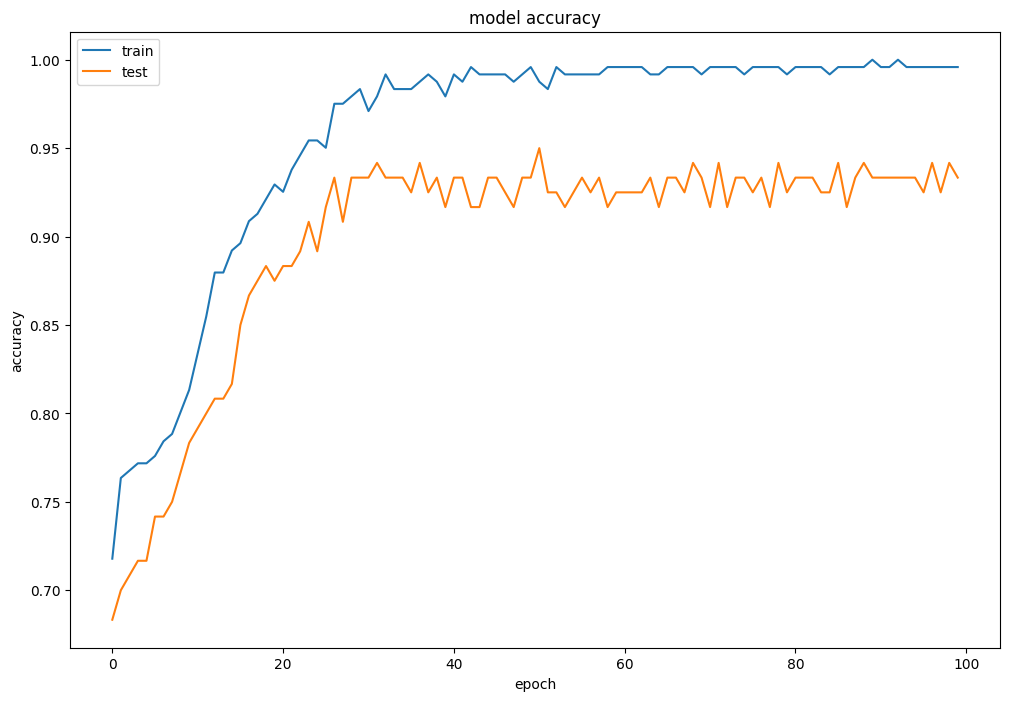

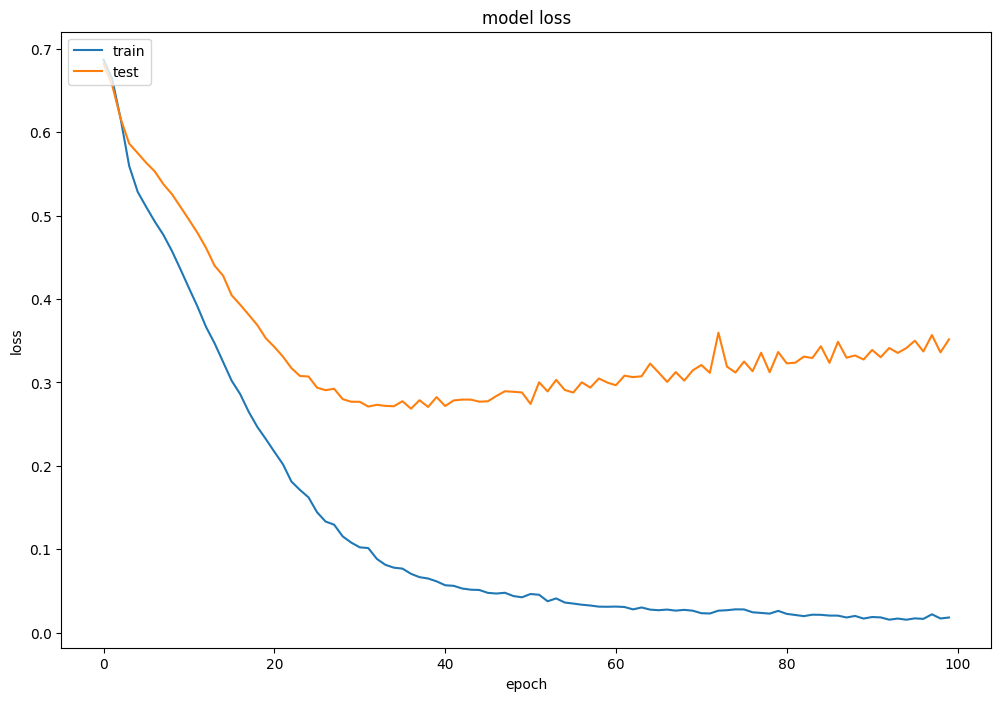

In [204]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [206]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability']
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 2ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
115,0,0.002494,0.002494
130,0,0.002202,0.002202
413,0,0.002305,0.002305
350,0,0.013999,0.013999
103,0,0.001990,0.001990
511,0,0.002040,0.002040
325,0,0.002048,0.002048
473,1,0.997041,0.997041
265,0,0.002103,0.002103
226,1,0.997041,0.997041


Neural Networks model using Linear Kernel has great predictive power to identify the fire size that would be either small or large into the Forest.